<a href="https://colab.research.google.com/github/LuisMig-code/Portifolio/blob/main/performace_dos_estudantes_em_provas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise da Performace Estudantil em Provas

De acordo com a **OCDE (Organização para a Cooperação e Desenvolvimento Econômico)** a maior preocupação para as nações do mundo no século XXI é a Educação ,visto os benefícios que a mesma trás a curto e longo prazo . Cada vez mais o ensino vem se tornando acessível , principalmente com a ampliação de sistemas de educação gratuitos por muitos países.


<p align=center>
  <img src="https://image.freepik.com/free-vector/focused-tiny-people-reading-books_74855-5836.jpg" height = "380px">
</p>

<p>Diversos paises e instituições privadas , ao redor do mundo , vêm trabalhando e investindo em soluções gratuitas e democráticas que visem uma educação de qualidade a todos , seja com mudanças de metodologias , seja com maiores investimentos capitais</p>

<p>Entretanto , nem todos acabam tendo as mesmas oportunidades , o mundo ainda apresenta suas disparidades sociais e econômicas e é isso que iremos analisar</p>


## Contextualização do problema:

Nesse problema o objetivo é simples: encontrar alguma correlação (nesse caso usaremos gráficos) entre a nota de estudantes ("vestibulandos") americanos e suas condições socioeconomicas : nivel educaional dos pais , curso preparatorio , tinham um almoo normal , gênero e grupo social

<p align=center>
  <img src="https://image.freepik.com/free-photo/sideview-students-prepearing-exams-university_7502-1123.jpg" height = "300px">
</p>

## Importar dados:

Os dados usando aqui estão disponíveis para download no site do kaggle por meio [deste link](https://www.kaggle.com/spscientist/students-performance-in-exams?select=StudentsPerformance.csv) . Consistindo basicamente em um Dataset que contêm 1000 entradas e 8 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [1]:
# importar pacontes necessários: 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://www.dropbox.com/s/8uh9hy1zn6ems5n/StudentsPerformance.csv?dl=1")

## Análise exploratória dos dados

A primeira coisa que faremos após importar o *dataset* será observar as dimensões do *DataFrame* e as primeiras linhas dos mesmo. Isso possibilitará criar uma breve visão do que temos a disposição.

Em relação à dimensionalidade dos dados, nosso *dataset* é composto por 1 mil entradas e 8 colunas.

In [3]:
print("Dimensões do Dataset:")
print("Temos {} linhas e {} colunas".format(df.shape[0] , df.shape[1]))

Dimensões do Dataset:
Temos 1000 linhas e 8 colunas


Agora vamos obter o 5 primeiros elementos do nosso *Dataset* para termos um noção melhor do que estamos trabalhando

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Vamos realizar o levantamento dos tipos de variáveis que compõem o *DataFrame* a fim de estabelecer a divisão entre as variáveis numéricas e as variáveis categóricas

In [5]:
# tipo das variáveis
print("\nTIPOS DAS VARIÁVEIS:")
print(df.dtypes)


TIPOS DAS VARIÁVEIS:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


Antes de começarmos a *plotar* gráficos devemos fazer as seguintes considerações:


*   Como nosso *Dataset* está, é possível interpretá-lo?
*   Qual o significado de cada item e coluna?
*   Quais dados possível temos para cada coluna?

Analisado isso, podemos passar a trabalhar individualmente em cada item para facilitar nosso entendimento





O que já podemos notar é que nosso *Dataset* está em inglês e que no nome das colunas possuem espaços , nosso primeiro objetivo é alterar isso para que possamos interpretar melhor nossos dados.

In [6]:
colunas_traduzidas = {
    "gender":"genero",
    "race/ethnicity" : "etinia",
    "parental level of education" : "nivel_educacional_dos_pais",
    "lunch" : "almoco",
    "test preparation course" : "curso_preparatorio",
    "math score" : "pontuacao_em_matematica",
    "reading score" : "pontuacao_em_leitura",
    "writing score" : "pontuacao_em_redacao"

}
df = df.rename(columns = colunas_traduzidas)

Após isso podemos começar a entender o valor individual de cada item em nosso dados, que ainda assim permanecem em inglês , mas para podermos alterar isso devemos primeiro compreender quais os "dados totais" , ou seja os dados unicos de cada coluna.

**obs:Não iremos considerar , agora , as colunas de pontuação , pois se tratam de valores numeros que variam , iremos analisar os valores únicos das colunas que tem valores do tipo string , ou seja , valores "escritos"**

In [7]:
# detectando todos os dados unicos que contem em cada coluna

for i in df[["genero","etinia","nivel_educacional_dos_pais","almoco","curso_preparatorio"]].columns:
  lista_atual = df["{}".format(i)].unique()
  print(i , ":" , lista_atual)
  print(" ")

genero : ['female' 'male']
 
etinia : ['group B' 'group C' 'group A' 'group D' 'group E']
 
nivel_educacional_dos_pais : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 
almoco : ['standard' 'free/reduced']
 
curso_preparatorio : ['none' 'completed']
 


Podemos abservar que temos resultados em inglês , e para tal , vamos traduzi-los também

In [8]:
valores_traduzidos = {
    "female" : "feminino",
    "male" : "masculino" ,
    "group A": "Grupo_A" , 
    "group B": "Grupo_B" , 
    "group C": "Grupo_C" , 
    "group D": "Grupo_D" , 
    "group D": "Grupo_E" , 
    "bachelor's degree" : "diploma de bacharel",
    "some college" : "faculdade incompleta",
    "master's degree" : "mestrado",
    "associate's degree" : "Tecnologo",
    "high school" : "ensino medio",
    "some high school" : "ensino medio incompleto",
    "standard" : "normal",
    "free/reduced" : "reduzido",
    "none" : "sem curso preparatorio",
    "completed" : "com curso preparatorio"
}
df = df.replace(valores_traduzidos.keys() , valores_traduzidos.values())

O que poderia nos ajudar também em nossa análise seria saber os valores mínimos e máximos das pontuações , fazendo uma amplitude dos dados , ou seja , pegarmos a maior nota em matemática e diminuirmos pela menor , e assim sucessivamente para cada coluna de pontuação:

In [9]:
# verificando a amplitude
amplitude_da_pontuacao_de_mtm = df["pontuacao_em_matematica"].max() - df["pontuacao_em_matematica"].min()
amplitude_da_pontuacao_de_leitura = df["pontuacao_em_leitura"].max() - df["pontuacao_em_leitura"].min()
amplitude_da_pontuacao_de_escrita = df["pontuacao_em_leitura"].max() - df["pontuacao_em_leitura"].min()
print("amplitude_da_pontuacao_de_mtm : ", amplitude_da_pontuacao_de_mtm)
print("amplitude_da_pontuacao_de_leitura : ", amplitude_da_pontuacao_de_leitura)
print("amplitude_da_pontuacao_de_escrita : ", amplitude_da_pontuacao_de_escrita)

amplitude_da_pontuacao_de_mtm :  100
amplitude_da_pontuacao_de_leitura :  83
amplitude_da_pontuacao_de_escrita :  83


Feito isso , cabe agora darmos sentido ao significado de cada coluna por meio de uma espécie de sumário:

### **Dicionário dos dados e colunas**:

*   genero = Gênero do indivíduo 

  1.   Masculino
  2.   Feminino


*   etinia = Com relação a esse, não são dados todas as especificações , **não podemos definir precisamente** o que cada valor dele representa , mas será levado em consideração em nossas análises

*   nivel_educacional_dos_pais = nível de estudo dos pais ou responsáveis do indivíduo

  1.   diploma de bacharel = Tem faculdade completa e diploma
  2.   faculdade incompleta = Não concluiu a faculdade
  3.   mestrado = Fez mestrado
  4.   Tecnologo = Concluiu um curso Tecnólogo ou um Curso técnico
  5.   ensino medio = Somente fez o ensino médio
  6.   ensino medio incompleto = Não concluiu o ensino médio
  
*   almoco = Refere-se ao fato do indivíduo ter tido uma alimentação normal durante o período de estudo para a prova

  1. normal = Tinha um almoço padrão
  2. reduzido = Comia menos do que o padrão ou não se alimentava

*  curso_preparatorio = Trata-se do fato do indivíduo ter ou não feito um curso preparatório

  1. sem curso preparatorio = Não fez curso ou fez pouco
  2. com curso preparatorio = Teve acesso ao curso preparatório e concluiu

*   pontuacao_em_matematica	= Pontuação na prova de matemática
*   pontuacao_em_leitura	= Pontuação na prova de leitura e interpretação 
*   pontuacao_em_redacao = Pontuação na prova de redação






In [10]:
df.head()

,genero,etinia,nivel_educacional_dos_pais,almoco,curso_preparatorio,pontuacao_em_matematica,pontuacao_em_leitura,pontuacao_em_redacao
0,feminino,Grupo_B,diploma de bacharel,normal,sem curso preparatorio,72,72,74
1,feminino,Grupo_C,faculdade incompleta,normal,com curso preparatorio,69,90,88
2,feminino,Grupo_B,mestrado,normal,sem curso preparatorio,90,95,93
3,masculino,Grupo_A,Tecnologo,reduzido,sem curso preparatorio,47,57,44
4,masculino,Grupo_C,faculdade incompleta,normal,sem curso preparatorio,76,78,75


## Pré Análise

è importante ressaltar , como já vimos , que possuímos um *Dataset* com 1000 entradas e 8 colunas , dividos por genero , etinia	, etc. Entretanto, como será que todas as nosss colunas se comportam? estão bem distribuidas?


Para começar isso é interessante analisarmos a proporção entre "feminino" e "mascuino" , ou seja , a proporção entre meninos e meninas em nosso *Dataset* , criando outro dataset e usando um gráfico de barras para representá-lo 

In [11]:
dict = {
    "Garotos":df.query("genero == 'masculino'").shape[0] ,
    "Meninas":df.query("genero == 'feminino'").shape[0]
}
dados_num_garotos_garotas = pd.DataFrame(dict.values() , index=dict.keys()).reset_index()
dados_num_garotos_garotas.columns = ["Sexo","Quantidade"]
dados_num_garotos_garotas["proporcao"] = dados_num_garotos_garotas["Quantidade"] / (dados_num_garotos_garotas["Quantidade"].sum())

In [12]:
print("nossos dados possuem {} meninas e {} meninos".format(dados_num_garotos_garotas['Quantidade'][0] , dados_num_garotos_garotas['Quantidade'][1]))

nossos dados possuem 482 meninas e 518 meninos


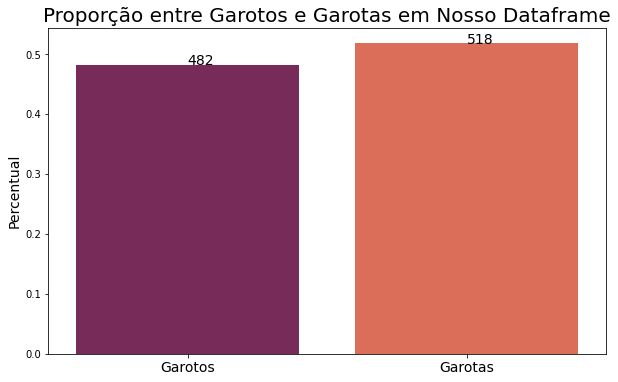

In [13]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = dados_num_garotos_garotas , x = "Sexo" , y = "proporcao" , palette = "rocket")
ax.set_xlabel("")
ax.set_ylabel("Percentual" , fontsize=14)
ax.set_xticklabels(["Garotos","Garotas"],fontsize=14)

ax.set_title("Proporção entre Garotos e Garotas em Nosso Dataframe" , fontsize = 20)

ax.text(0,0.482,"482" , fontsize = 14)
ax.text(1,0.518,"518" , fontsize = 14)

ax=ax

In [14]:
dados_num_garotos_garotas

,Sexo,Quantidade,proporcao
0,Garotos,482,0.482
1,Meninas,518,0.518


Assim , já podemos concluir que temos mais indivíduos do sexo "feminino" em nossos dados , o que posteriormente será importante m nossa análise

Já que comparamos a proporção entre Garotos e Garotas , vamos também comparar as proporções entre a coluna "etinia" e "nivel_educacional_dos_pais" para termos noção da forma como estão organizados os dados:

In [15]:
raca_etinia = pd.DataFrame(df["etinia"].value_counts()).reset_index()
raca_etinia.columns = ["grupo","quantidade"]

fig = px.pie(raca_etinia, values='quantidade', names='grupo' , title='Proporção entre os Grupos Etinicos')
fig.show()

In [16]:
nivel_pais = pd.DataFrame(df["nivel_educacional_dos_pais"].value_counts()).reset_index()
nivel_pais.columns = ["nivel","quantidade"]

fig = px.pie(nivel_pais, values='quantidade', names='nivel' , title="Proporção entre os niveis educacionais dos pais dos indivíduos")
fig.show()

Com essa análise podemos ter a noção de que o "Grupo_E" e o "Grupo_C" prodominam .
 
Já na análise do nivel educacional dos pais podemos notar que os dados são levemente balanceados , entretanto podemos perceber que os pais com faculdade completa("diploma de bacharel") e aqueles que possuem mestrado("mestrado") representam uma minoria em nossos dados.

## Análises Gráficas:

Para começar nossas análises seria interessantes que observássemos primeiramente como se distribuem as notas em cada campo dos conhecimentos , baseado , a priori , pelo gênero dos indivíduos , assim , podemos começar a ter um breve noção dos potenciais de cada um.

Para nos auxiliar e evitar repetições de códigos , criaremos uma função específica para *plotar* tais gráficos

In [17]:
df.sample(1)

,genero,etinia,nivel_educacional_dos_pais,almoco,curso_preparatorio,pontuacao_em_matematica,pontuacao_em_leitura,pontuacao_em_redacao
388,feminino,Grupo_E,ensino medio,normal,sem curso preparatorio,62,64,64


In [18]:
def plota_histograma_pontuacao(data,coluna,label_x,estilo,cor=None):
  ax = sns.histplot(data = data ,x=coluna, hue="genero", element=estilo , color = cor)
  ax.legend(["Masculino","Feminino"],fontsize=12)
  ax.set_xlabel(label_x,fontsize=14)
  ax.set_ylabel("")

  plt.ylim(0, 70)

  return ax

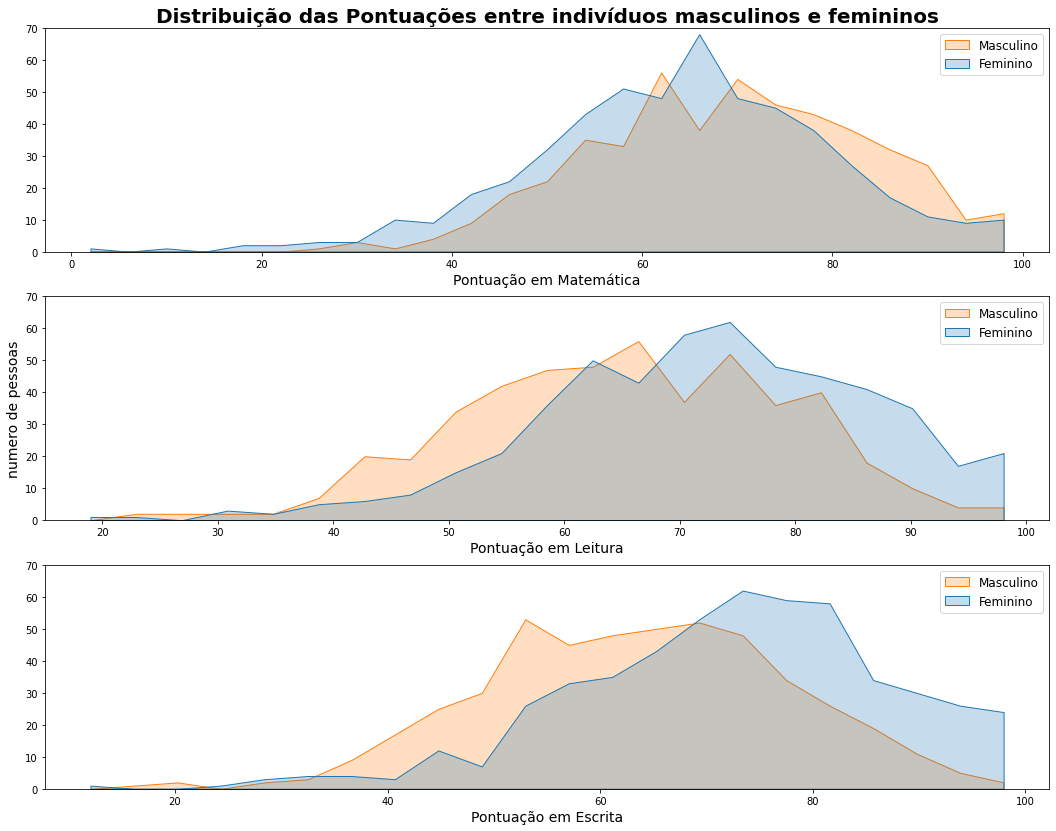

In [19]:
plt.figure(figsize=(18,14))
ax = plt.subplot(3,1,1)
ax.set_title('Distribuição das Pontuações entre indivíduos masculinos e femininos',fontsize=20,loc='center',fontweight="bold")

# gráfico 1: pontuação em matemática
ax1 = plota_histograma_pontuacao(df,"pontuacao_em_matematica","Pontuação em Matemática","poly")

# gráfico 2: pontuação em leitura
plt.subplot(3,1,2)
ax2 = plota_histograma_pontuacao(df,"pontuacao_em_leitura","Pontuação em Leitura","poly")
ax2.set_ylabel("numero de pessoas",fontsize=14)

# gráfico 3: pontuação em escrita
plt.subplot(3,1,3)
ax3 = plota_histograma_pontuacao(df,"pontuacao_em_redacao","Pontuação em Escrita","poly")

ax=ax

A partir desse gráfico podemos começar a ter algumas conclusões : **em média** indivíduos do sexo Feminino tender a ser bem melhores em Escrita e Leitura , já os indivíduos do sexo Masculino tendem a ser melhores em Matemática.

**Entretanto** , quando se fala de matemática, podemos perceber que quando as pontuações chegam mais próximas a nota máxima(100) , as diferenças por genero são pequenas , os contrário do que se observa em Escrita e Leitura , onde a diferença se torna acentuada.

### Comparações

Quando se trata de notas de alunos , é comum falarmos de "nota média" , ou seja somarmos as notas de todos os alunos e depois divido-lo pelo total de alunos. 

Sabe-se que não é o ideal usar esse parâmetro de média quando se trata de notas, mas vamos calculá-la para entendermos o porque:

In [20]:
df.groupby("genero")[["pontuacao_em_matematica","pontuacao_em_leitura","pontuacao_em_redacao"]].mean().round(2)

,pontuacao_em_matematica,pontuacao_em_leitura,pontuacao_em_redacao
genero,,,
feminino,63.63,72.61,72.47
masculino,68.73,65.47,63.31


De maneira geral , usa-se a média quando se trata de uma distribuição que representa uma curva normal, assim como representada abaixo, algo totalemtente diferente do que temos em nosso gráfico.
<p align=center>
  <img src="https://ds055uzetaobb.cloudfront.net/image_optimizer/1dbcc5a80e3fb541aa4678fcff58bb26ca717902.png" height = "400px">
</p>

<p>Além do mais, usar uma média torna-se absurdo em nosso caso visto que podemos não ter , como no exemplo acima, uma pessoa do genero Maculino com nota em matemática de 68,73 , ou mesmo que apresente desempenho superior à 63,31 em redação por exemplo</p>

<P>Para nosso cenário , o ideal seria usarmos a mediana, ou seja um valor que divida nossos dados em 50-50 , vou explicar aqui:</p>

*Imagine que você tenha 5 alunos , e suas notas sejam as seguintes : 1,2,5,7,8 . nesse caso nossa **mediana** seria 5 , por que? simples , observe que o "5" divide em meio a meio nossas notas , onde 50% dos alunos tiraram entre 1 e 5 e os outros 50% tiraram entre 5 e 8*
 
vamos lá ?





In [21]:
df_mediana_agrupado_por_genero = df.groupby("genero")[["pontuacao_em_matematica","pontuacao_em_leitura","pontuacao_em_redacao"]].median()
df_mediana_agrupado_por_genero.reset_index(inplace=True)
df_mediana_agrupado_por_genero.columns = ["genero","mediana_matematica","mediana_leitura","mediana_redacao"]
df_mediana_agrupado_por_genero

,genero,mediana_matematica,mediana_leitura,mediana_redacao
0,feminino,65,73,74
1,masculino,69,66,64


Com esses dados podemos perceber que 50% dos indivíduos do sexo Masculino tem nota em Matemática acima de 69 , e assim sucessivamente para os diferentes gênero e pontuações.

É interessantes que ressaltemos um ponto importante: as diferenças de nota entre "Feminino" e "Masculino" quando se trata de leitura e redação são bem grandes , chegando a 10 pontos de disparidade.

<p>Seria interessantes se pudéssemos visualizar essa diferença em forma de gráfico, assim como fizemos anteriormente!</p>

In [22]:
def plota_grafico_mediana(data , labels , y , color="",legenda_de_y="",):
  ax1 = sns.barplot(data=data , y=y , x= labels , color=color)
  ax1.set_ylabel(legenda_de_y , fontsize=14)
  ax1.set_xticklabels(labels, fontsize=14 )

  #pegando a coluna com os valores
  df = data[y]

  #selecionando os valores
  v1 = df[0]
  v2 = df[1]

  #plotando os valores junto ao gráfico
  ax1.text(0,v1+0.25,"{}".format(v1) , fontsize= 13)
  ax1.text(1,v2+0.25,"{}".format(v2) , fontsize= 13)

  #setando um limite para o eixo y:
  plt.ylim(0, 80)

  return ax1


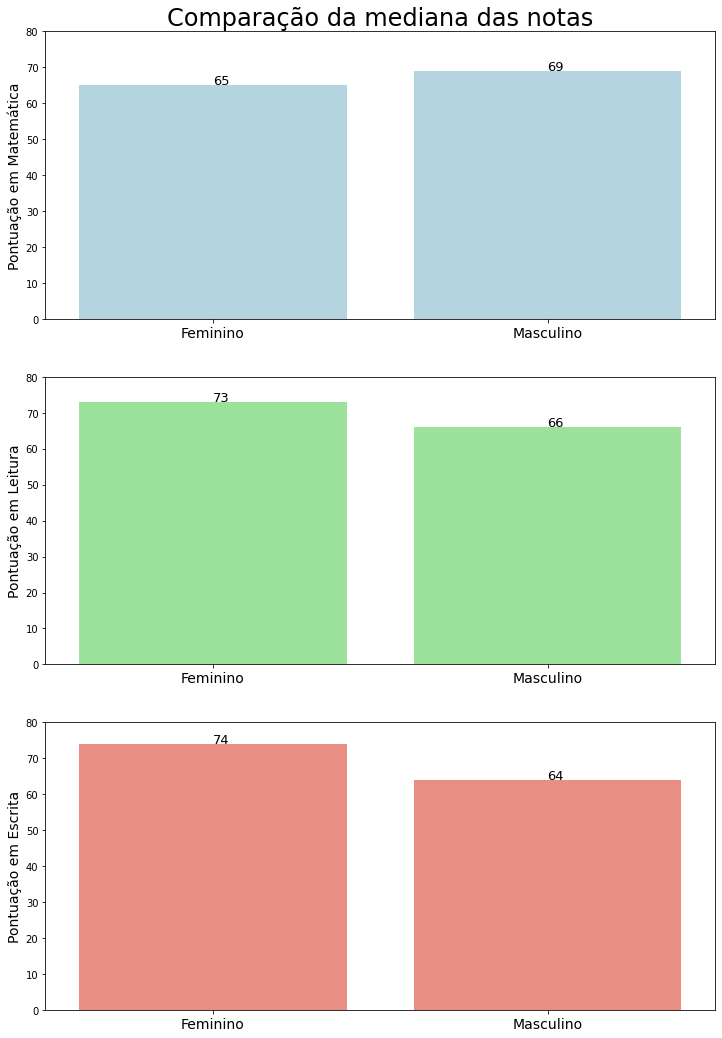

In [23]:
labels = ["Feminino","Masculino"]

plt.figure(figsize=(12,18))
ax = plt.subplot(3,1,1)
ax.set_title('Comparação da mediana das notas',fontsize=24,loc='center')

# gráfico 1: pontuação em matemática
ax1 = plota_grafico_mediana(df_mediana_agrupado_por_genero , labels , "mediana_matematica" , "lightblue" , "Pontuação em Matemática")

# gráfico 2: pontuação em leitura
plt.subplot(3,1,2)
ax2 = plota_grafico_mediana(df_mediana_agrupado_por_genero,labels,"mediana_leitura","lightgreen","Pontuação em Leitura")


# gráfico 3: pontuação em escrita
plt.subplot(3,1,3)
ax3 = plota_grafico_mediana(df_mediana_agrupado_por_genero,labels,"mediana_redacao" , "salmon" , "Pontuação em Escrita")


ax=ax

Uma breve conclusão que podemos ter aqui é a seguinte: De fato indivíduos do Gênero Masculino tendem a ter notas melhores em matemática , mas quando comparados a Indivíduos do Gênero Feminino notamos que são diferenças não tão acentuadas, com apenas **4** pontos de diferença

Já quando comparamos o mesmo para os casos de Leitura e Escrita , vemos que as diferenças já são acentuadas , com **7** pontos de diferença em Leitura e **10** em escrita  . Além disso , notamos que as notas dos indivíduos do Gênero Femino estão acima de 70 , enquanto em **todos** os casos para os do Gênero Masculino estã abaixo de 70

Vamos partir para uma análise mais agressiva agora , para tal , vamos dividir nossos dados em 2 , para que possamos examinar individualmente cada um:


1.   Aqueles que estão **acima** da mediana
2.   Aqueles que estão **abaixo** da mediana



In [24]:
# definindo os valores da mediana para cada indivíduo
mediana_mulheres_mtm = df_mediana_agrupado_por_genero["mediana_matematica"][0]
mediana_homens_mtm = df_mediana_agrupado_por_genero["mediana_matematica"][1]

mediana_mulheres_ltr = df_mediana_agrupado_por_genero["mediana_leitura"][0]
mediana_homens_ltr = df_mediana_agrupado_por_genero["mediana_leitura"][1]

mediana_mulheres_red = df_mediana_agrupado_por_genero["mediana_redacao"][0]
mediana_homens_red = df_mediana_agrupado_por_genero["mediana_redacao"][1]

### Indivíduos Acima da Mediana

In [25]:
df_feminino_acima_mediana = df.query("genero == 'feminino' & pontuacao_em_matematica >= {} & pontuacao_em_leitura >= {} & pontuacao_em_redacao >= {}".format(mediana_mulheres_mtm , mediana_mulheres_ltr , mediana_mulheres_red))
df_feminino_acima_mediana = df_feminino_acima_mediana.sort_values("curso_preparatorio")
df_feminino_acima_mediana["media"] = ((df_feminino_acima_mediana["pontuacao_em_matematica"]+df_feminino_acima_mediana["pontuacao_em_leitura"]+df_feminino_acima_mediana["pontuacao_em_redacao"])/3).round(0)

In [26]:
df_masculino_acima_mediana = df.query("genero == 'masculino' & pontuacao_em_matematica >= {} & pontuacao_em_leitura >= {} & pontuacao_em_redacao >= {}".format(mediana_mulheres_mtm , mediana_mulheres_ltr , mediana_mulheres_red))
df_masculino_acima_mediana = df_masculino_acima_mediana.sort_values("curso_preparatorio")
df_masculino_acima_mediana["media"] = ((df_masculino_acima_mediana["pontuacao_em_matematica"]+df_masculino_acima_mediana["pontuacao_em_leitura"]+df_masculino_acima_mediana["pontuacao_em_redacao"])/3).round(0)

O primeiro fato a ser levantado é: Há alguma relaçao entre a **escolaridade dos pais** e a **pontuação**? algo que varia de família para família , mas no geral o que se imagina é que pais que tiveram boa escolaridade tendem a incentivar mais o filhos a estudar e alcançar boas notas , muito chegam a pagar **cursos preparatório** aos filhos nesse intuito.

Tendo isso em mente , vamos analisar 3 variáveis de uma vez só , nivel de escolaridade dos pais , pontuação e presença de curso preparatório , tanto para indivíduos do gênero Femino quanto Masculino

**obs: Apenas para essa situação usaremos a média das notas , puramente para representação NÃO para CATEGORIZAÇÃO dos indivíduos**

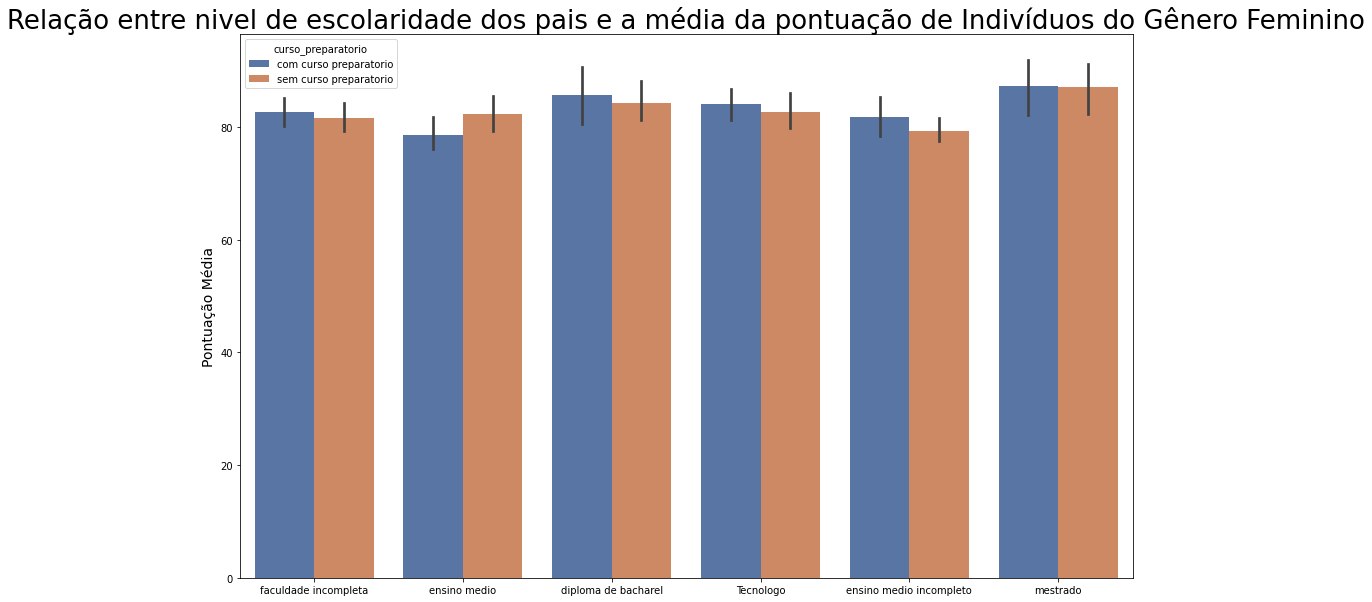

In [27]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x=df_feminino_acima_mediana["nivel_educacional_dos_pais"] , y=df_feminino_acima_mediana.media , hue=df_feminino_acima_mediana["curso_preparatorio"] , palette="deep")
ax.set_title("Relação entre nivel de escolaridade dos pais e a média da pontuação de Indivíduos do Gênero Feminino" , fontsize=26 , loc="center")
ax.set_ylabel("Pontuação Média" , fontsize=14)
ax.set_xlabel("")

ax=ax

Nesse primero caso podemos constatar que **não houveram** diferenças tão grandes nas notas de indivíduos do gênero Feminino com o nível de escolaridade dos pais (apesar de existirem sim algumas) , de tal forma **não há como estabeler** uma relação tão grande entre a presença ou não de curso preparatório para vestibular, em alguns casos não houve diferença nenhuma (como nos caso do "mestrado") e em outros , indivíduos sem curso obtiveram notas melhores(como no caso do "ensino médio")

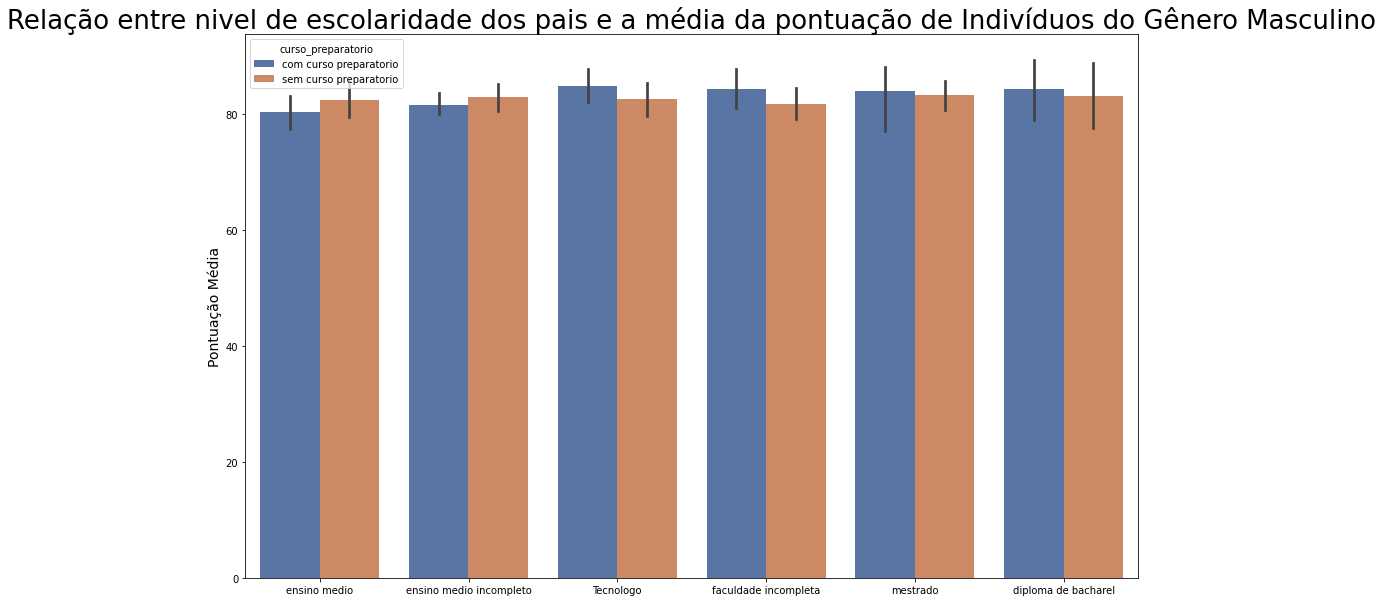

In [28]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x=df_masculino_acima_mediana["nivel_educacional_dos_pais"] , y=df_masculino_acima_mediana.media , hue=df_masculino_acima_mediana["curso_preparatorio"] , palette="deep")
ax.set_title("Relação entre nivel de escolaridade dos pais e a média da pontuação de Indivíduos do Gênero Masculino" , fontsize=26 , loc="center")
ax.set_ylabel("Pontuação Média" , fontsize=14)
ax.set_xlabel("")

ax=ax

Novamente , como constato acima , **não notamos diferenças tão grandes**, na verdade , neste caso podemos observar que as **diferenças foram ainda bem menores** , em quase todos os casos podemos notar pontuações bem próximas , tanto para diferente niveis de escolaridade dos pais/responsáveis , quanto para a presença de um curso preparatório. 

Enquanto na Comparação com o gráfico dos indivíduos do gênero feminino abservamos um certo efeito "onda" nas barras , neste não vemos muito isso.

ainda temos , também, que analisar como cada nota se comporta quando comparado a outras variáveis . Precisamos saber se a "origem étinica" , a presença (ou não) de almoço afeta em alguma coisa nas notas dos indivíduos

In [29]:
def plota_grafico_de_barra(data , eixo_x  , divisao , titulo , titulo_eixo_x  , titulo_eixo_y , paleta):
  ax = sns.barplot(x=data[eixo_x] , y=data.media , hue=data[divisao] , palette=paleta)
  #ax.set_title(titulo , fontsize=26 , loc="center")
  ax.set_ylabel(titulo_eixo_y , fontsize=18)
  ax.set_xlabel(titulo_eixo_x)
  plt.ylim(0, 95)


  return ax

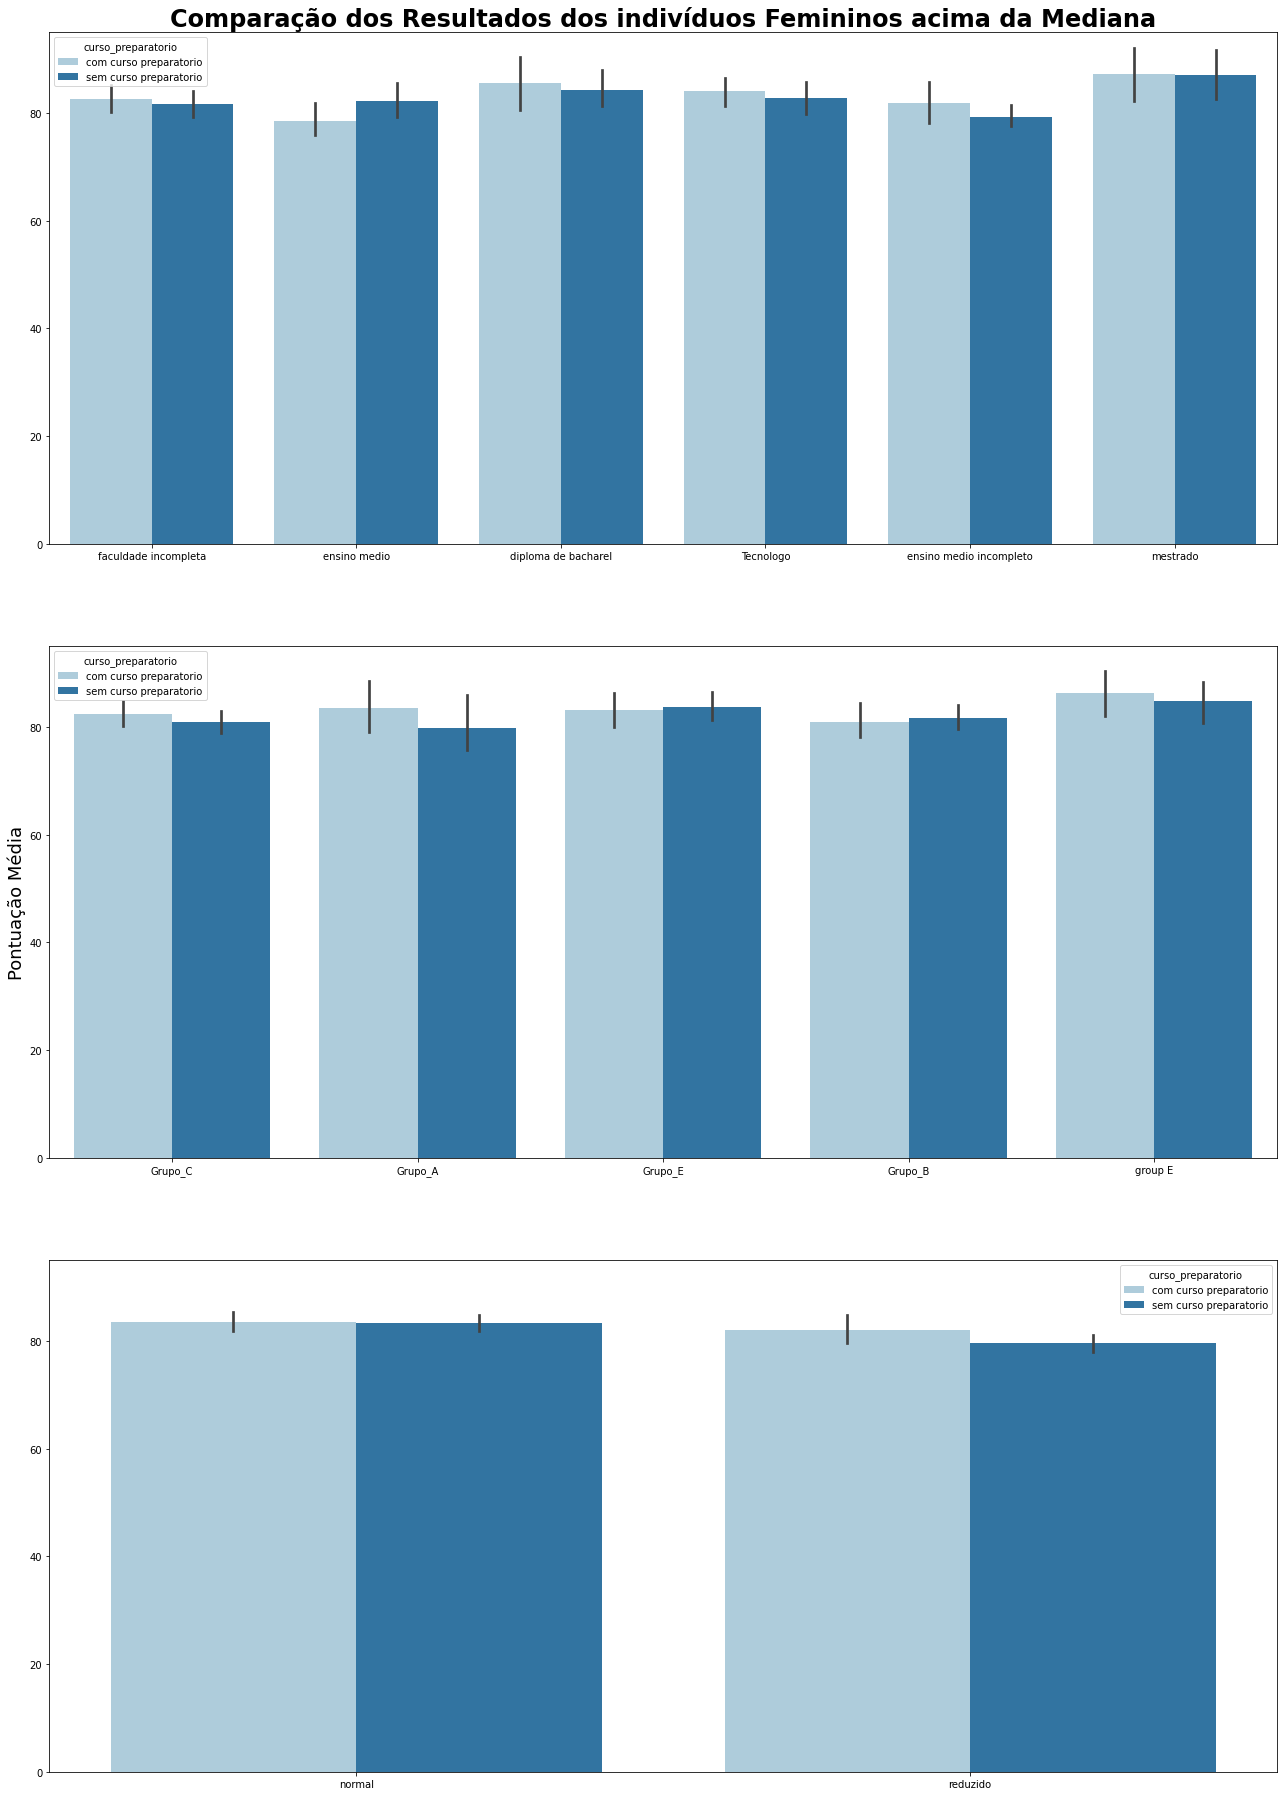

In [30]:
plt.figure(figsize=(22,32))
ax = plt.subplot(3,1,1)
ax.set_title("Comparação dos Resultados dos indivíduos Femininos acima da Mediana",loc='center', fontdict= { 'fontsize': 24, 'fontweight':'bold'})

# gráfico 1: pontuação em matemática
titulo = "Relação entre nivel de escolaridade dos pais e a média da pontuação das Garotas"
ax1 = plota_grafico_de_barra(df_feminino_acima_mediana,"nivel_educacional_dos_pais","curso_preparatorio",titulo,"","","Paired")

# gráfico 2: pontuação em leitura
plt.subplot(3,1,2)
titulo = "Relação entre 'race/ethnicity' e a média da pontuação das Garotas"
ax2 = plota_grafico_de_barra(df_feminino_acima_mediana,"etinia","curso_preparatorio",titulo,"","Pontuação Média","Paired")


# gráfico 3: pontuação em escrita
plt.subplot(3,1,3)
titulo = "Relação entre 'Almoço' e a média da pontuação das Garotas"
ax3 = plota_grafico_de_barra(df_feminino_acima_mediana,"almoco","curso_preparatorio",titulo,"","","Paired")

ax=ax

O primeiro gráfico já fora analisado anteriormente , já com relação ao segundo podemos notar que as diferenças apresentam , novamente , um efeito mais "onda" dos dados , mas no geral todos os indivíduos independente do "grupo étinico" apresentam resultado acima de 80 , ou próximo.

Com relação ao Almoço de cada indivíduo percebemos que independente do tipo do mesmo , as notas sem mant~em bem constantes , com uma pequena exceção aqueles que **não fizeram curso preparatório** e tinha almoço reduzido , que obtiveram notas menores , mas ainda assim próximos ao 80.

Nos resta analisar as notas dos garotos agora:

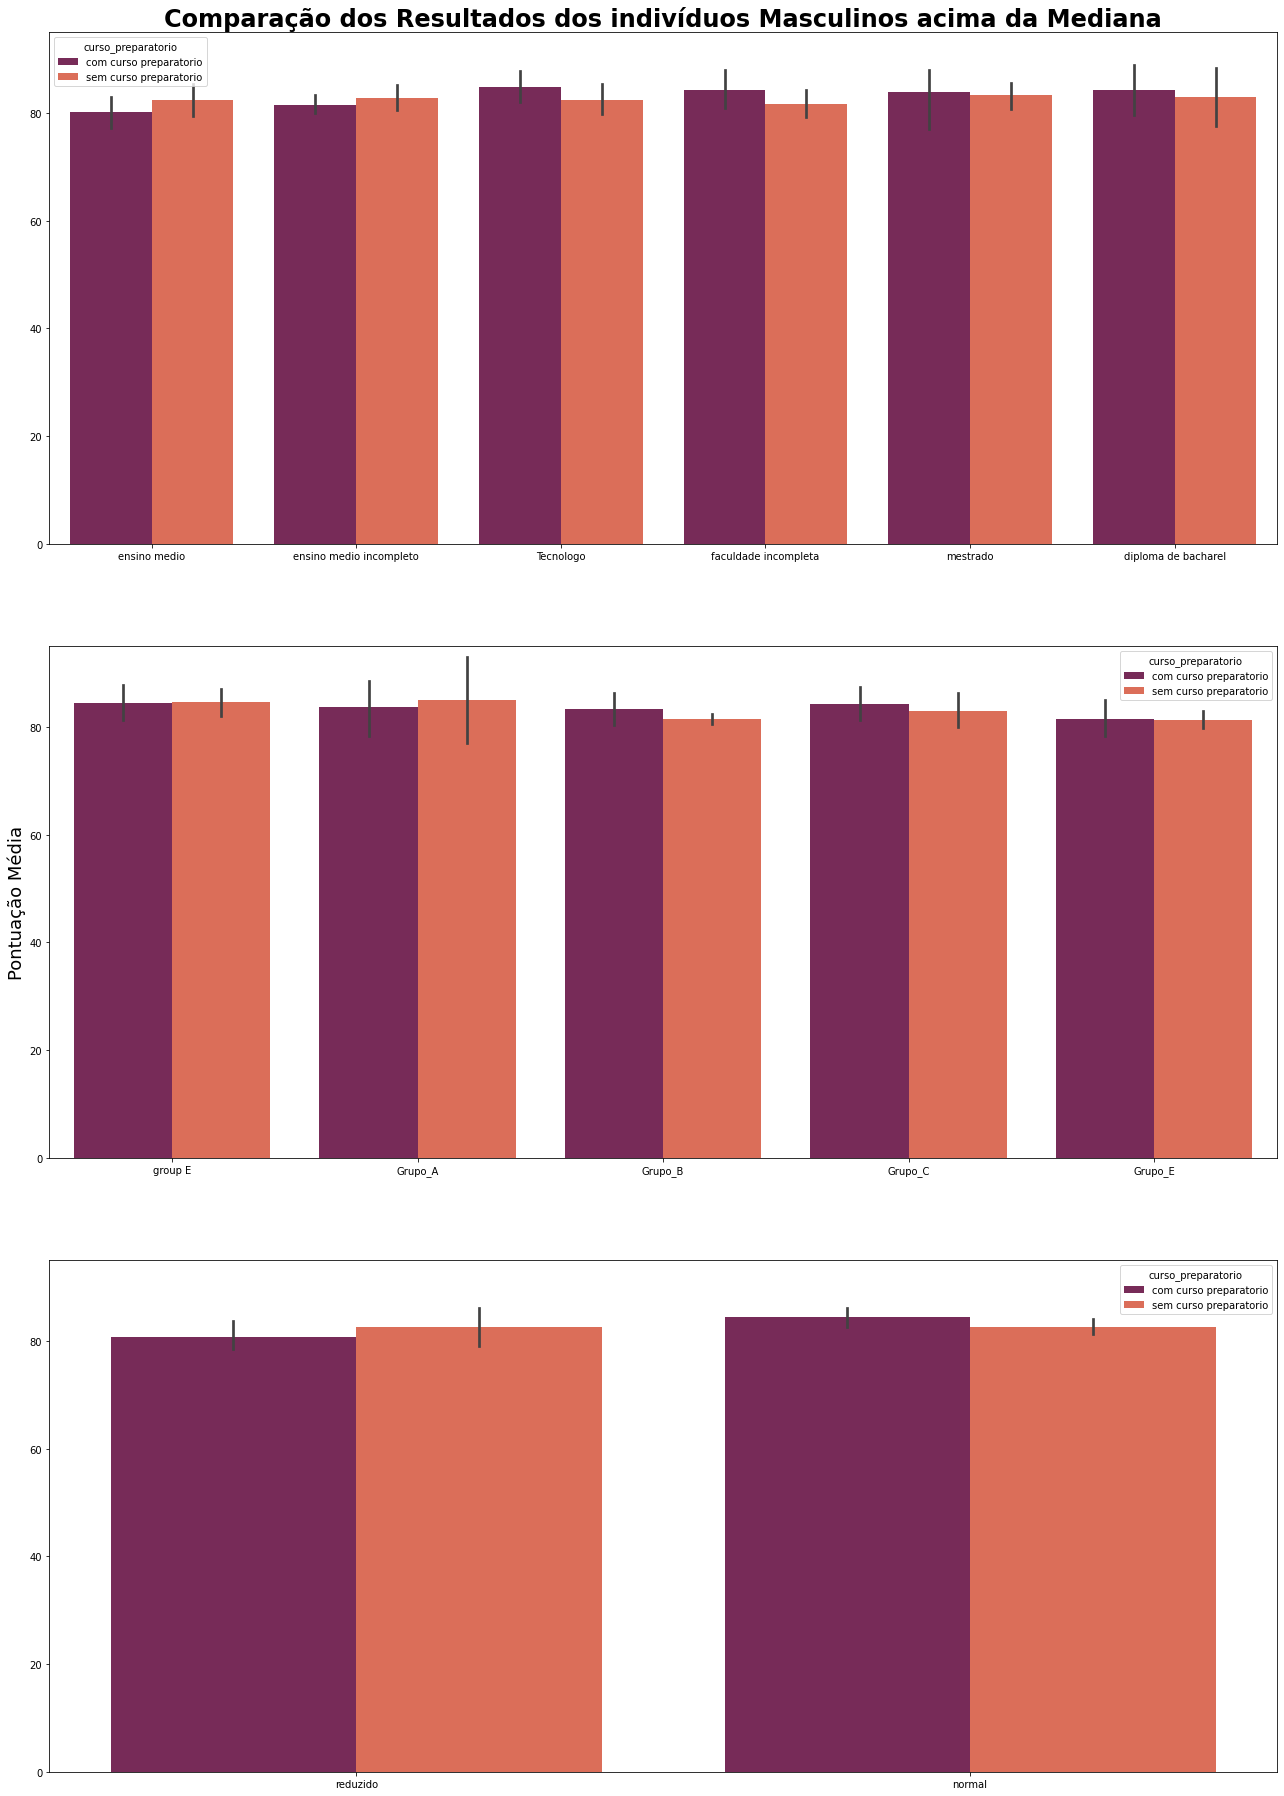

In [31]:
plt.figure(figsize=(22,32))
ax = plt.subplot(3,1,1)
ax.set_title("Comparação dos Resultados dos indivíduos Masculinos acima da Mediana",loc='center', fontdict= { 'fontsize': 24, 'fontweight':'bold'})

# gráfico 1: pontuação em matemática
titulo = "Relação entre nivel de escolaridade dos pais e a média da pontuação das Garotas"
ax1 = plota_grafico_de_barra(df_masculino_acima_mediana,"nivel_educacional_dos_pais","curso_preparatorio",titulo,"","","rocket")

# gráfico 2: pontuação em leitura
plt.subplot(3,1,2)
titulo = "Relação entre 'race/ethnicity' e a média da pontuação das Garotas"
ax2 = plota_grafico_de_barra(df_masculino_acima_mediana,"etinia","curso_preparatorio",titulo,"","Pontuação Média","rocket")


# gráfico 3: pontuação em escrita
plt.subplot(3,1,3)
titulo = "Relação entre 'Almoço' e a média da pontuação das Garotas"
ax3 = plota_grafico_de_barra(df_masculino_acima_mediana,"almoco","curso_preparatorio",titulo,"","","rocket")

ax=ax

Novamente, o primeiro gráfico já fora analisado , mas com relação ao segundo notamos uma **consistencia maior ainda** entre os "grupos étnicos" , com excessão do Grupo_B que parece ter notas menores que o commum. Um dado interessante é que o Grupo_A alcançou **notas maiores** sem terem feito curso preparatorio , mas se observarmos pela linha na barra do mesmo , notamos que houveram também maiores variações de nota.

No terceiro gráfico notamos algo peculiar , em geral aqueles que tinha **curso preparatório** e **almoço reduzido** possuiam  notas menores , provavelmente notamos o efeito de um certo **desgaste** o indivíduo , mas não pode ser também generalizado , o mesmo , visto que não notamos esse comportamento para o Gênero Feminino.


Após analisado os indivíduos com notas acima da mediana , vamos analisar aqueles com nota abaixo dela:

### Indivíduos Abaixo da Mediana

In [32]:
df_feminino_abaixo_mediana = df.query("genero == 'feminino' & pontuacao_em_matematica < {} & pontuacao_em_leitura < {} & pontuacao_em_redacao < {}".format(mediana_mulheres_mtm , mediana_mulheres_ltr , mediana_mulheres_red))
df_feminino_abaixo_mediana = df_feminino_abaixo_mediana.sort_values("curso_preparatorio")
df_feminino_abaixo_mediana["media"] = ((df_feminino_abaixo_mediana["pontuacao_em_matematica"]+df_feminino_abaixo_mediana["pontuacao_em_leitura"]+df_feminino_abaixo_mediana["pontuacao_em_redacao"])/3).round(0)

In [33]:
df_masculino_abaixo_mediana = df.query("genero == 'masculino' & pontuacao_em_matematica < {} & pontuacao_em_leitura < {} & pontuacao_em_redacao < {}".format(mediana_mulheres_mtm , mediana_mulheres_ltr , mediana_mulheres_red))
df_masculino_abaixo_mediana = df_masculino_abaixo_mediana.sort_values("curso_preparatorio")
df_masculino_abaixo_mediana["media"] = ((df_masculino_abaixo_mediana["pontuacao_em_matematica"]+df_masculino_abaixo_mediana["pontuacao_em_leitura"]+df_masculino_abaixo_mediana["pontuacao_em_redacao"])/3).round(0)

Como se trata daqueles que tiveram notas abaixo da mediana , é interessante que analisássemos como se distribui as pontuações , assim podemos ter uma noção se aqueles que ficaram abaixo da mediana em notas as materias estavam muitos distantes daqueles que ficaram acima

In [34]:
def plota_grafico_distribuicao(df , eixo_x , cor , titulo_eixo_x , titulo_eixo_y , cor_texto_demarcado , genero , titulo,mediana_x):
  ax = sns.histplot(df[eixo_x] , color = cor , kde=True)
  ax.set_xlabel(titulo_eixo_x , fontsize=14)
  ax.set_title(titulo , fontdict={ 'fontsize': 24, 'fontweight':'bold'})
  ax.set_ylabel(titulo_eixo_y , fontsize=14)
  plt.ylim(0, 45)
  plt.xlim(0, 77)

  sexo = None
  if genero.lower() == "feminino":
    sexo = 0
  else:
    sexo = 1

  nota_maxima_mtm_garotas = df_mediana_agrupado_por_genero[mediana_x][sexo]
  ax.text(nota_maxima_mtm_garotas,0,"{}".format(nota_maxima_mtm_garotas) , fontsize = 12 , color=cor_texto_demarcado)

  return ax

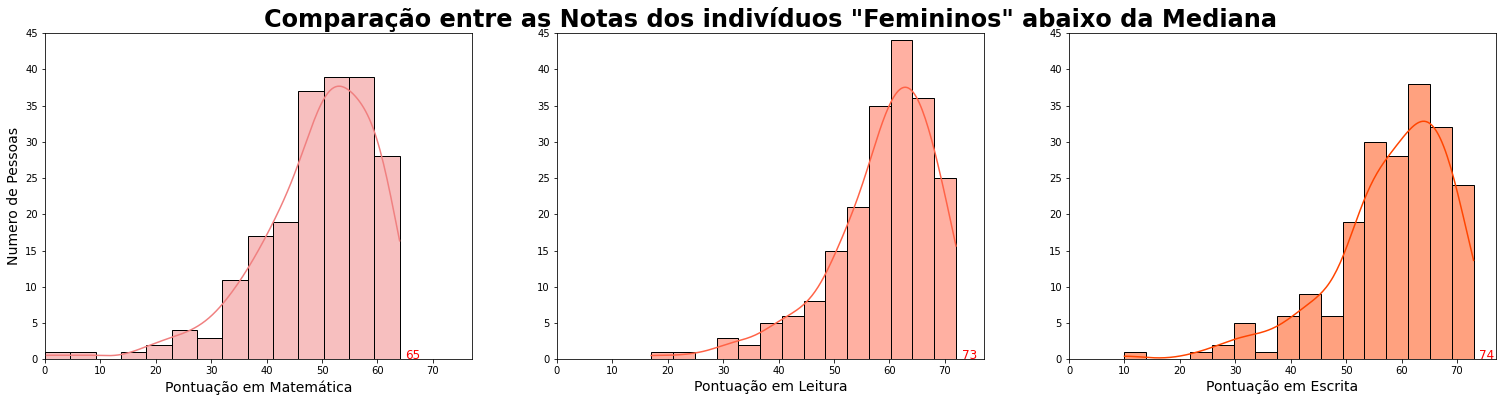

In [35]:
plt.figure(figsize=(26,6))
ax = plt.subplot(1,3,1)
titulo = 'Comparação entre as Notas dos indivíduos "Femininos" abaixo da Mediana'

# gráfico 1: pontuação em matemática
ax1 = plota_grafico_distribuicao(df_feminino_abaixo_mediana,"pontuacao_em_matematica",'lightcoral',"Pontuação em Matemática","Numero de Pessoas","r","feminino","","mediana_matematica")

# gráfico 2: pontuação em leitura
plt.subplot(1,3,2)
ax2 = plota_grafico_distribuicao(df_feminino_abaixo_mediana,"pontuacao_em_leitura",'tomato',"Pontuação em Leitura","","r","feminino",titulo,"mediana_leitura")

# gráfico 3: pontuação em escrita
plt.subplot(1,3,3)
ax3 = plota_grafico_distribuicao(df_feminino_abaixo_mediana,"pontuacao_em_redacao",'orangered',"Pontuação em Escrita","","r","feminino","","mediana_redacao")



ax=ax


Se seguirmos a linha desenhada no gráfico podemos perceber que a "concentração" de notas se encontra cada vez mais para a **direita** , isso quer dizer que mesmo abaixo da **mediana** as notas dos **indivíduos Femininos se encontram mais próximo a ela**, principalmente as notas de Leitura. Entretanto , as pontuações das notas de matemática não se concentram tanto para esse lado , assim como a Pontuação de Escrita, que tem uma "calda" mais alongada para a esquerda.

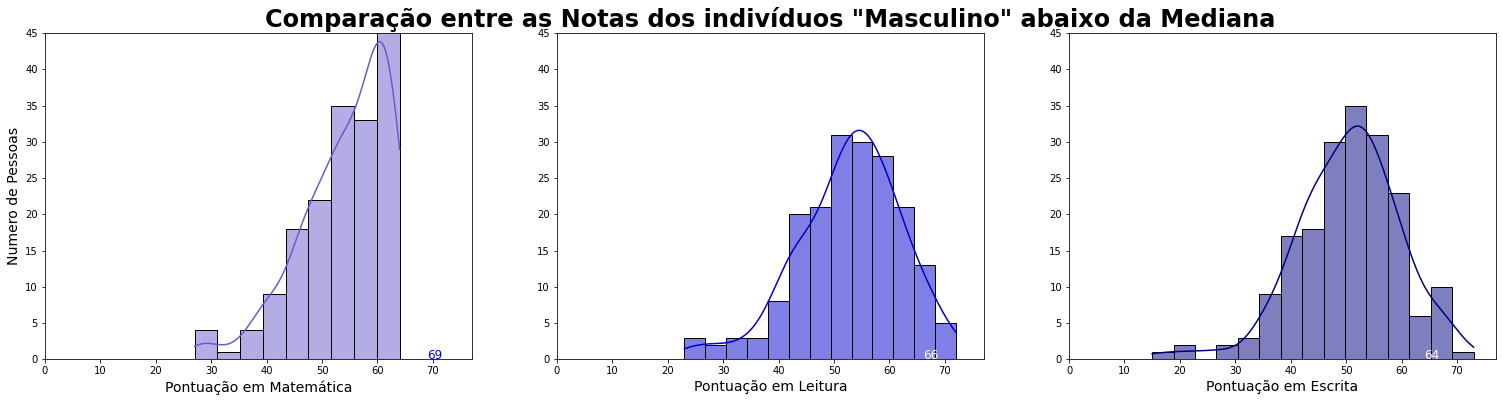

In [36]:
plt.figure(figsize=(26,6))
ax = plt.subplot(1,3,1)
titulo = 'Comparação entre as Notas dos indivíduos "Masculino" abaixo da Mediana'

# gráfico 1: pontuação em matemática
ax1 = plota_grafico_distribuicao(df_masculino_abaixo_mediana,"pontuacao_em_matematica",'slateblue',"Pontuação em Matemática","Numero de Pessoas","b","masculino","","mediana_matematica")

# gráfico 2: pontuação em leitura
plt.subplot(1,3,2)
ax2 = plota_grafico_distribuicao(df_masculino_abaixo_mediana,"pontuacao_em_leitura",'mediumblue',"Pontuação em Leitura","","w","masculino",titulo,"mediana_leitura")

# gráfico 3: pontuação em escrita
plt.subplot(1,3,3)
ax3 = plota_grafico_distribuicao(df_masculino_abaixo_mediana,"pontuacao_em_redacao",'navy',"Pontuação em Escrita","","w","masculino","","mediana_redacao")


ax=ax


Com relação a estes gráficos podemos já perceber **grandes diferenças**. Com relação a nota de matemática , notamos que a mediana (marcada em azul e branco non eixo x) está **mais longe do que o convencional** , em relação ao gráfico , o que podemos notar é que provavelmente o indivíduo com essa nota estava mais distantes dos outros , além disso , a s notas se distribuem quase como uma **reta** . Por outro lado , as outras duas pontuações (Leitura e Escrita) cada vez parecem com uma normal , **não tendendo muito para a esquerda** , concentrado as pontuações bem próximo aos 40-50 pontos

Por fim, vamos refazer os mesmo gráficos que fizemos para aqueles acima da mediana para vermos se há correlação entre as difernetes variáveis e as notas abaixo do comum dos indivíduos

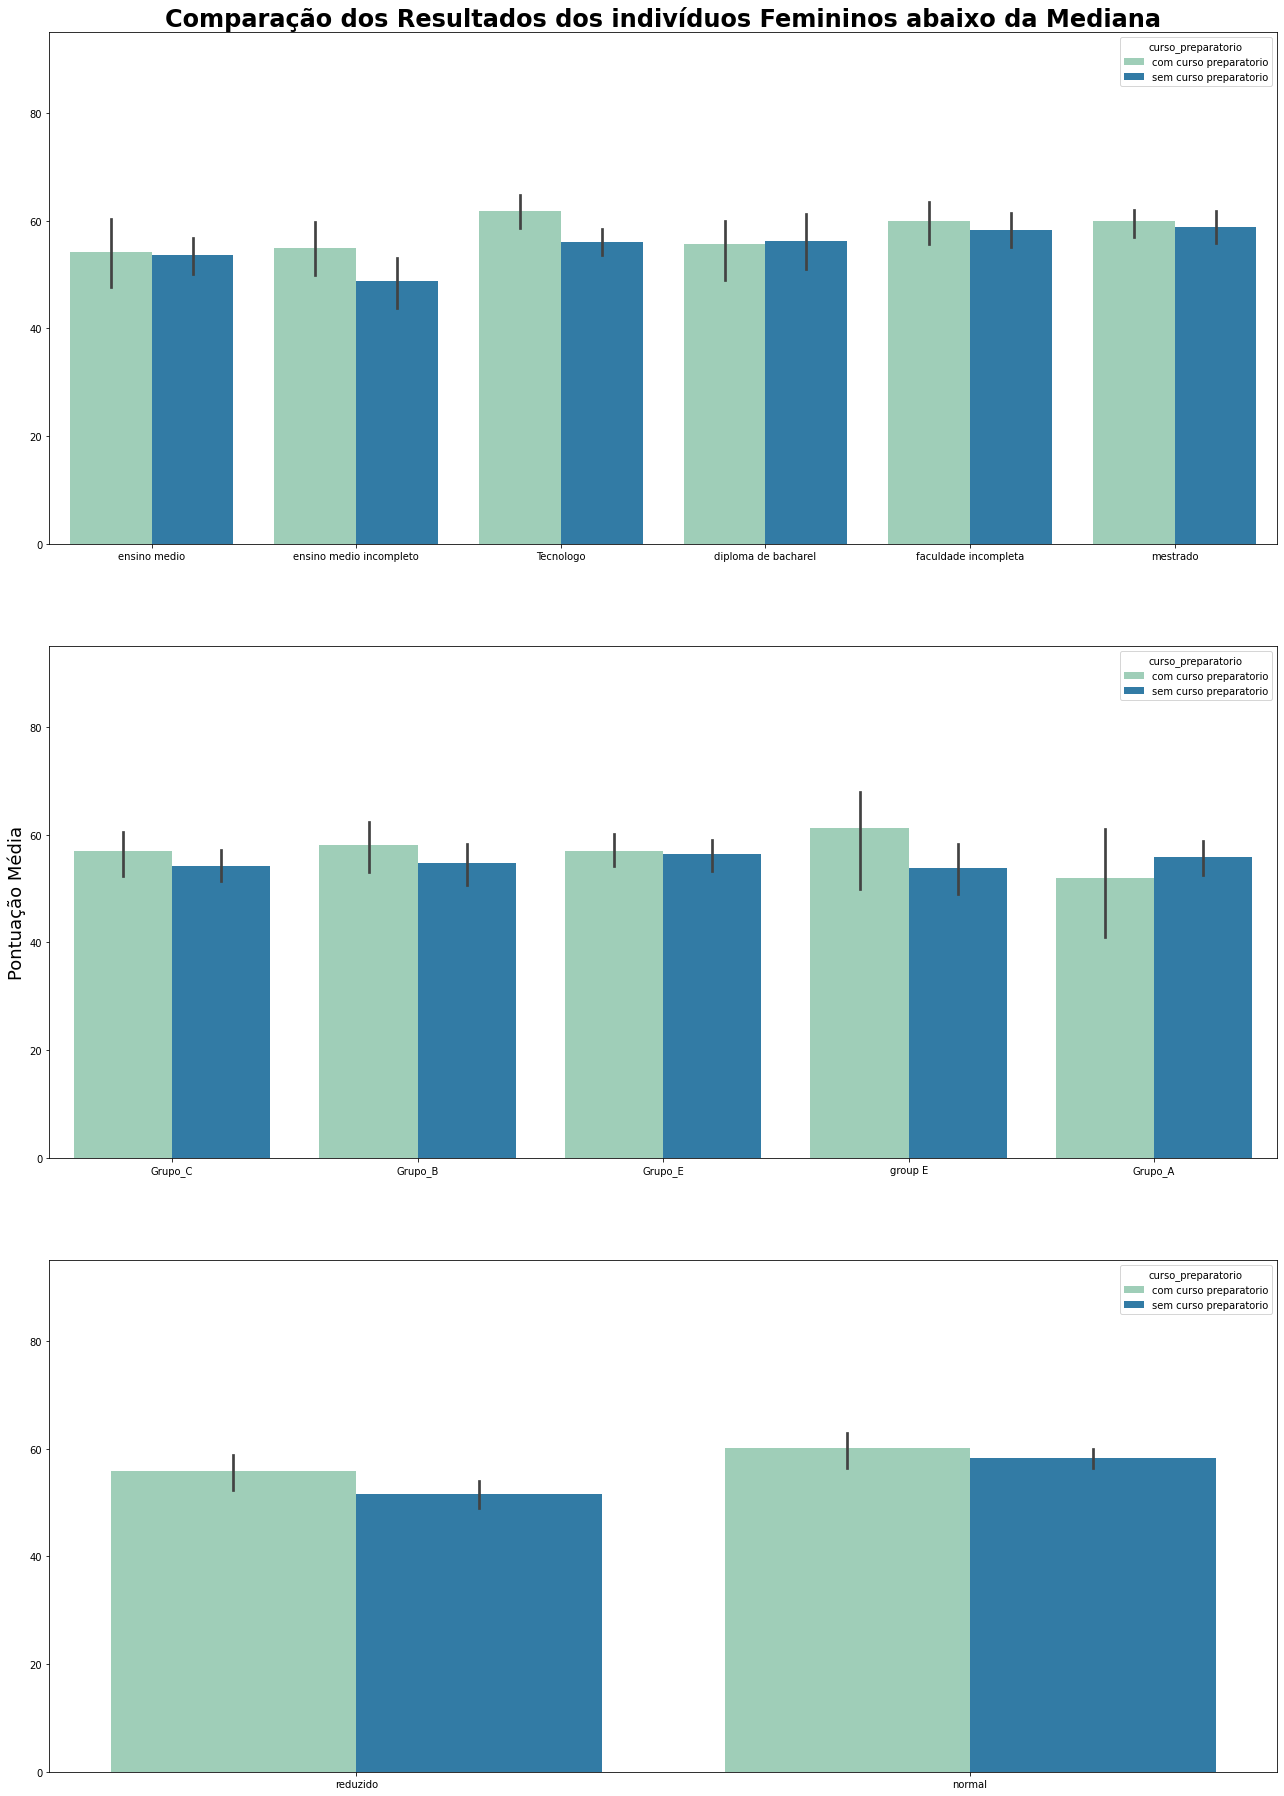

In [37]:
plt.figure(figsize=(22,32))
ax = plt.subplot(3,1,1)
ax.set_title("Comparação dos Resultados dos indivíduos Femininos abaixo da Mediana",loc='center', fontdict= { 'fontsize': 24, 'fontweight':'bold'})

# gráfico 1: pontuação em matemática
titulo = ""
ax1 = plota_grafico_de_barra(df_feminino_abaixo_mediana,"nivel_educacional_dos_pais","curso_preparatorio",titulo,"","","YlGnBu")

# gráfico 2: pontuação em leitura
plt.subplot(3,1,2)
titulo = ""
ax2 = plota_grafico_de_barra(df_feminino_abaixo_mediana,"etinia","curso_preparatorio",titulo,"","Pontuação Média","YlGnBu")


# gráfico 3: pontuação em escrita
plt.subplot(3,1,3)
titulo = ""
ax3 = plota_grafico_de_barra(df_feminino_abaixo_mediana,"almoco","curso_preparatorio",titulo,"","","YlGnBu")

ax=ax

Novamente não podemos considerar o grupo étinico e o nível de escolaridade dos pais como determinante na pontuação , por exemplo: o desempenho entre jovens os quais os pais são formados e aqueles que os pais se quer concluiram o ensino médio são próximos , entretando , o que os diferencia de fato é a influência que um curso preparatório pode ter , que no geral aqueles que o fizeram obtiveram desempenho bem superiores aos demais 

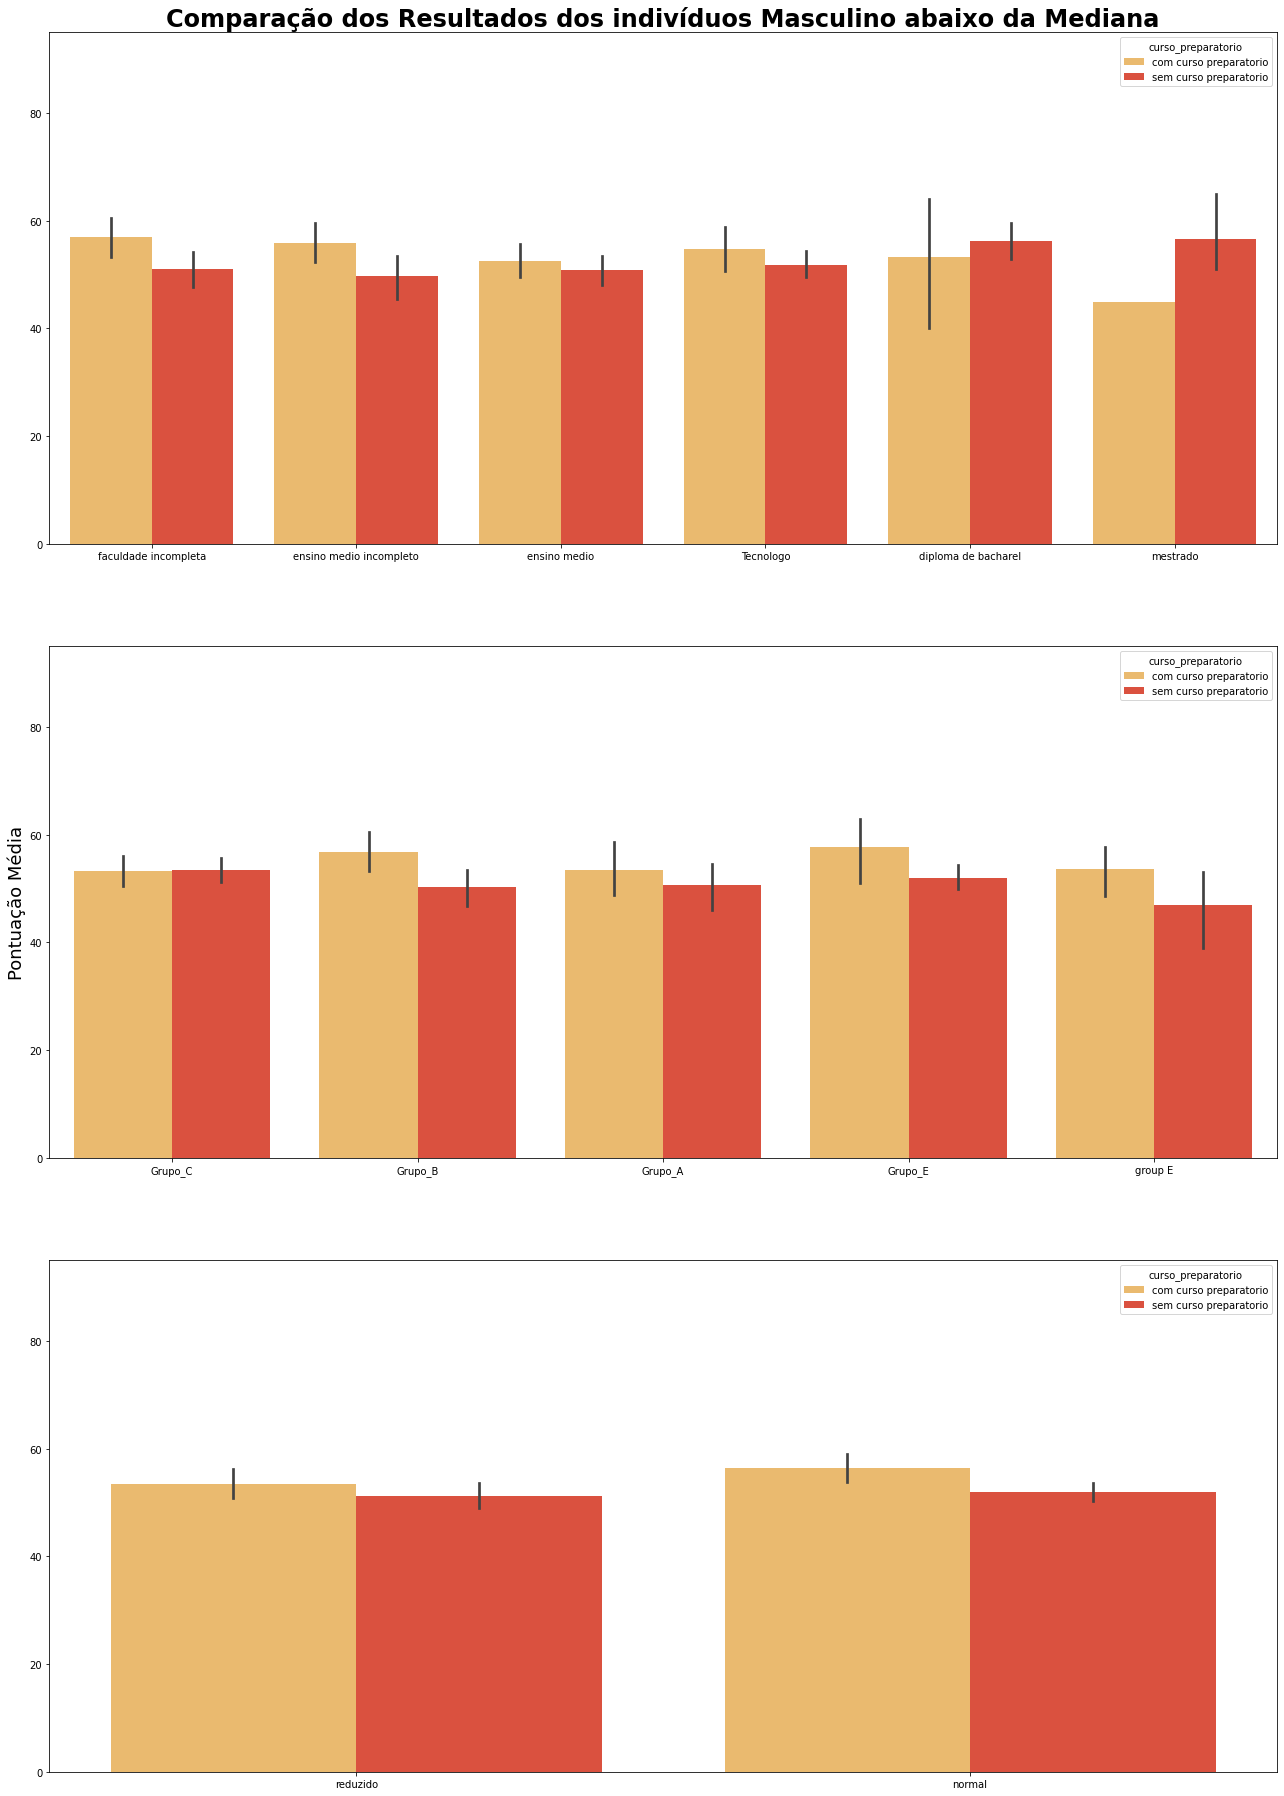

In [38]:
plt.figure(figsize=(22,32))
ax = plt.subplot(3,1,1)
ax.set_title("Comparação dos Resultados dos indivíduos Masculino abaixo da Mediana",loc='center', fontdict= { 'fontsize': 24, 'fontweight':'bold'})

# gráfico 1: pontuação em matemática
ax1 = plota_grafico_de_barra(df_masculino_abaixo_mediana,"nivel_educacional_dos_pais","curso_preparatorio",titulo,"","","YlOrRd")

# gráfico 2: pontuação em leitura
plt.subplot(3,1,2)
ax2 = plota_grafico_de_barra(df_masculino_abaixo_mediana,"etinia","curso_preparatorio",titulo,"","Pontuação Média","YlOrRd")


# gráfico 3: pontuação em escrita
plt.subplot(3,1,3)
ax3 = plota_grafico_de_barra(df_masculino_abaixo_mediana,"almoco","curso_preparatorio",titulo,"","","YlOrRd")

ax=ax

Novamente, o que podemos perceber é que , no geral , pessoas com curso preparatório tendem a ser dar melhor , nestes casos , mas o que também notamos é o fato de que , pela primeira vez , quanto maior o grau de escolaridade dos pais , mais vemos que o fato de não fazer cursos preparatórios se tornou decisivo na obtenção de notas superiores

## Conclusões

A partir de todos os dados coletados e analisados pudemos observar que pessoas do gênero Feminino tendem a ser melhores em matérias como Escrita e Leitura , já os do gênero Masculino tendem a ser melhores em matérias de Exatas(matemática) , entretanto , quanto maior as pontuações nesta última , menores são as diferenças entre eles , sendo que quando dizemos "melhores em matérias de Exatas" , a diferença é pequena . Enquanto isso , as do gênero Feminino são bem superiores naquilo que envolve Leitura e Interpretação , quando comparado aos outros indivíduos.

Outro fato constatado é que o nível escolar dos pais/responsáveis não influencia tanto nas notas, que tendem a ser diferentes mas próximas , não podendo estabelecer ligações claras entre os mesmo , isso equivale tanto para aqueles que tem boas pontuações, quanto aqueles que as tem menores.

A única diferença observado foi que pessoas abaixo da mediana e que fizeram cursos preparatórios tinha notas superiores aqueles que não fizeram.